In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets
restaurants = pd.read_csv(r"D:\Work\IITK_AI_ML\Capstone\Dataset\Capstone 3\resturants.csv")
sales = pd.read_csv(r"D:\Work\IITK_AI_ML\Capstone\Dataset\Capstone 3\sales.csv")
items = pd.read_csv(r"D:\Work\IITK_AI_ML\Capstone\Dataset\Capstone 3\items.csv")

In [3]:
# Inspect datasets
print("Restaurants Shape:", restaurants.shape)
print("Sales Shape:", sales.shape)
print("Items Shape:", items.shape)

Restaurants Shape: (6, 2)
Sales Shape: (109600, 4)
Items Shape: (100, 5)


In [4]:
restaurants.head()

,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe


In [5]:
sales.head()

,date,item_id,item_count,price
0,01-01-2019,3,2,58.44
1,01-01-2019,4,22,581.24
2,01-01-2019,12,7,34.09
3,01-01-2019,13,12,50.16
4,01-01-2019,16,136,436.56


In [6]:
items.head()

,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09
2,3,1,Sweet Fruity Cake,931,29.22
3,4,1,Amazing Steak Dinner with Rolls,763,26.42
4,5,5,Milk Cake,583,6.07


In [7]:
# Check for missing values
print("Missing Values in Restaurants:")
print(restaurants.isnull().sum())
print("Missing Values in Sales:")
print(sales.isnull().sum())
print("Missing Values in Items:")
print(items.isnull().sum())

Missing Values in Restaurants:
id      0
name    0
dtype: int64
Missing Values in Sales:
date          0
item_id       0
item_count    0
price         0
dtype: int64
Missing Values in Items:
id          0
store_id    0
name        0
kcal        0
cost        0
dtype: int64


In [8]:
# Ensure common column names exist
print("Sales Columns:", sales.columns)
print("Items Columns:", items.columns)
print("Restaurants Columns:", restaurants.columns)

Sales Columns: Index(['date', 'item_id', 'item_count', 'price'], dtype='object')
Items Columns: Index(['id', 'store_id', 'name', 'kcal', 'cost'], dtype='object')
Restaurants Columns: Index(['id', 'name'], dtype='object')


In [9]:
# Rename columns for consistency
items.rename(columns={'id': 'item_id'}, inplace=True)
restaurants.rename(columns={'id': 'store_id'}, inplace=True)


In [10]:
# Merge datasets
merged_df = sales.merge(items, on='item_id', how='left')
merged_df = merged_df.merge(restaurants, left_on='store_id', right_on='store_id', how='left')

In [11]:
# Convert date to datetime format with error handling
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce', dayfirst=True)

In [12]:
# Drop rows with invalid dates
merged_df = merged_df.dropna(subset=['date'])

In [13]:
# Calculate 'sales_amount'
merged_df['sales_amount'] = merged_df['price'] * merged_df['item_count']

In [14]:
# Ensure correct column names for stores and items
if 'name_x' in merged_df.columns:
    merged_df.rename(columns={'name_x': 'item_name'}, inplace=True)
if 'name_y' in merged_df.columns:
    merged_df.rename(columns={'name_y': 'store_name'}, inplace=True)


In [15]:
merged_df.head()

,date,item_id,item_count,price,store_id,item_name,kcal,cost,store_name,sales_amount
0,2019-01-01,3,2,58.44,1,Sweet Fruity Cake,931,29.22,Bob's Diner,116.88
1,2019-01-01,4,22,581.24,1,Amazing Steak Dinner with Rolls,763,26.42,Bob's Diner,12787.28
2,2019-01-01,12,7,34.09,1,Fantastic Sweet Cola,478,4.87,Bob's Diner,238.63
3,2019-01-01,13,12,50.16,1,Sweet Frozen Soft Drink,490,4.18,Bob's Diner,601.92
4,2019-01-01,16,136,436.56,1,Frozen Milky Smoothy,284,3.21,Bob's Diner,59372.16


In [16]:
# ==============================================
# Exploratory Data Analysis (EDA)
# ==============================================


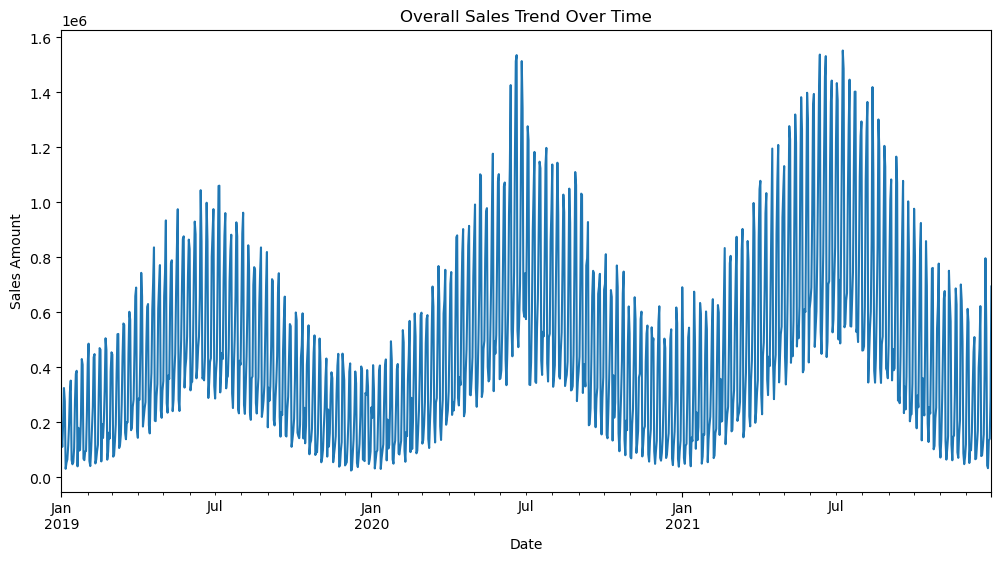

In [17]:
plt.figure(figsize=(12, 6))
merged_df.groupby('date')['sales_amount'].sum().plot()
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

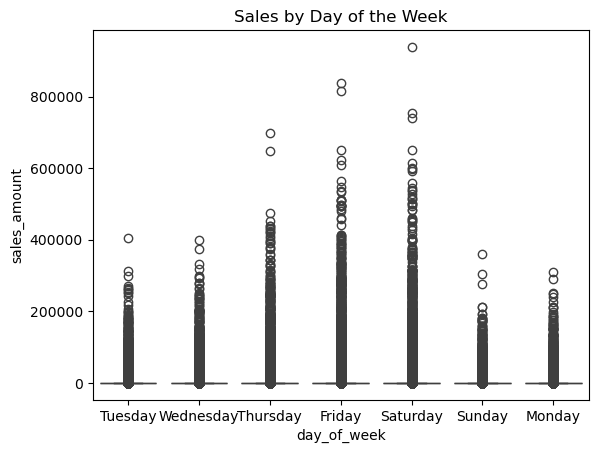

In [18]:
# Sales trend across days of the week
merged_df['day_of_week'] = merged_df['date'].dt.day_name()
sns.boxplot(x='day_of_week', y='sales_amount', data=merged_df)
plt.title('Sales by Day of the Week')
plt.show()

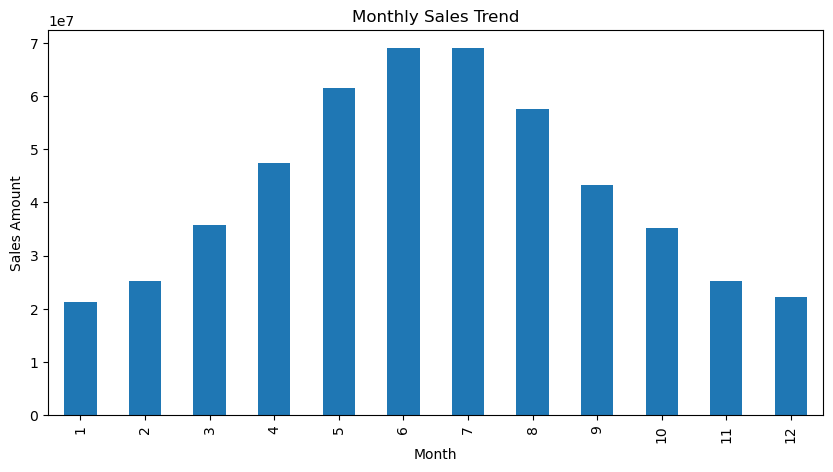

In [19]:
# Monthly sales trend
merged_df['month'] = merged_df['date'].dt.month
monthly_sales = merged_df.groupby('month')['sales_amount'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()


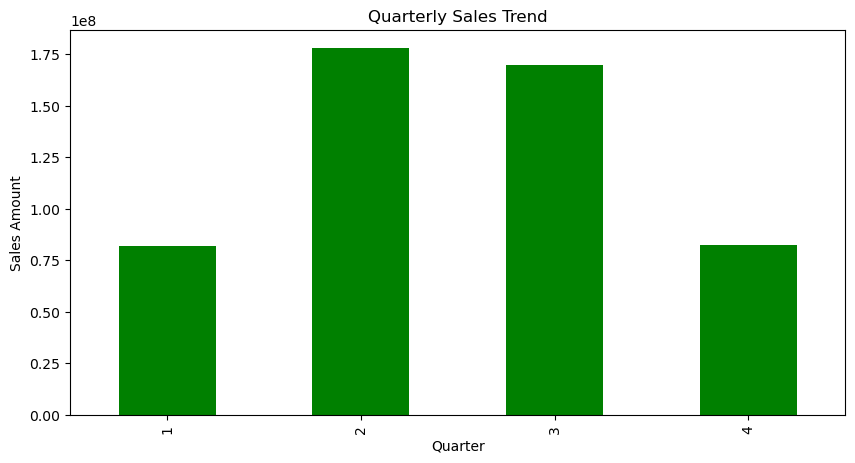

In [20]:
# Quarterly sales trend
merged_df['quarter'] = merged_df['date'].dt.quarter
quarterly_sales = merged_df.groupby('quarter')['sales_amount'].sum()
plt.figure(figsize=(10, 5))
quarterly_sales.plot(kind='bar', color='green')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')
plt.show()

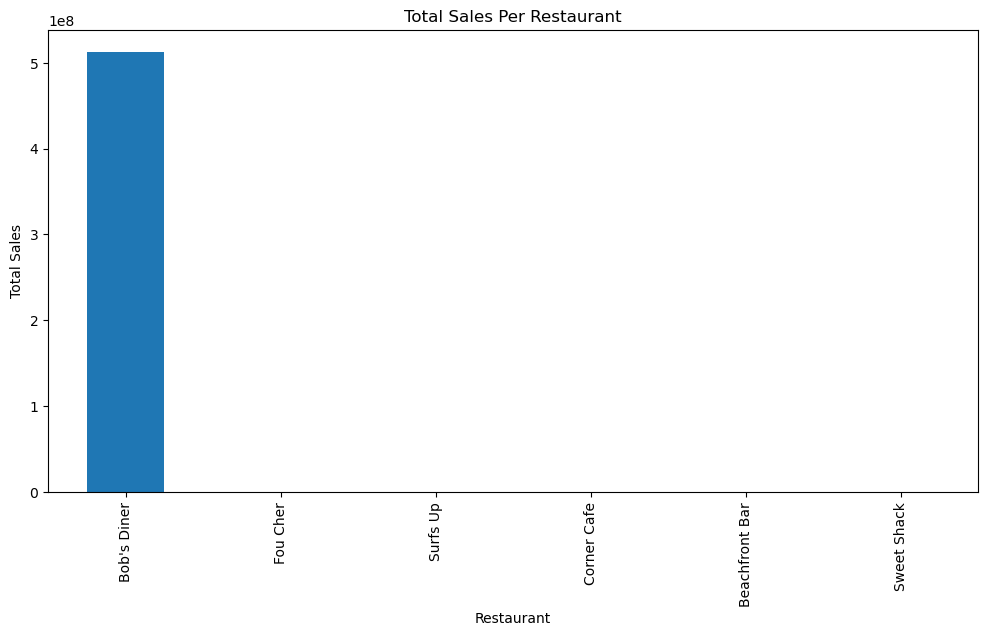

In [21]:
# Store-wise sales comparison
store_sales = merged_df.groupby('store_name')['sales_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
store_sales.plot(kind='bar')
plt.title('Total Sales Per Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

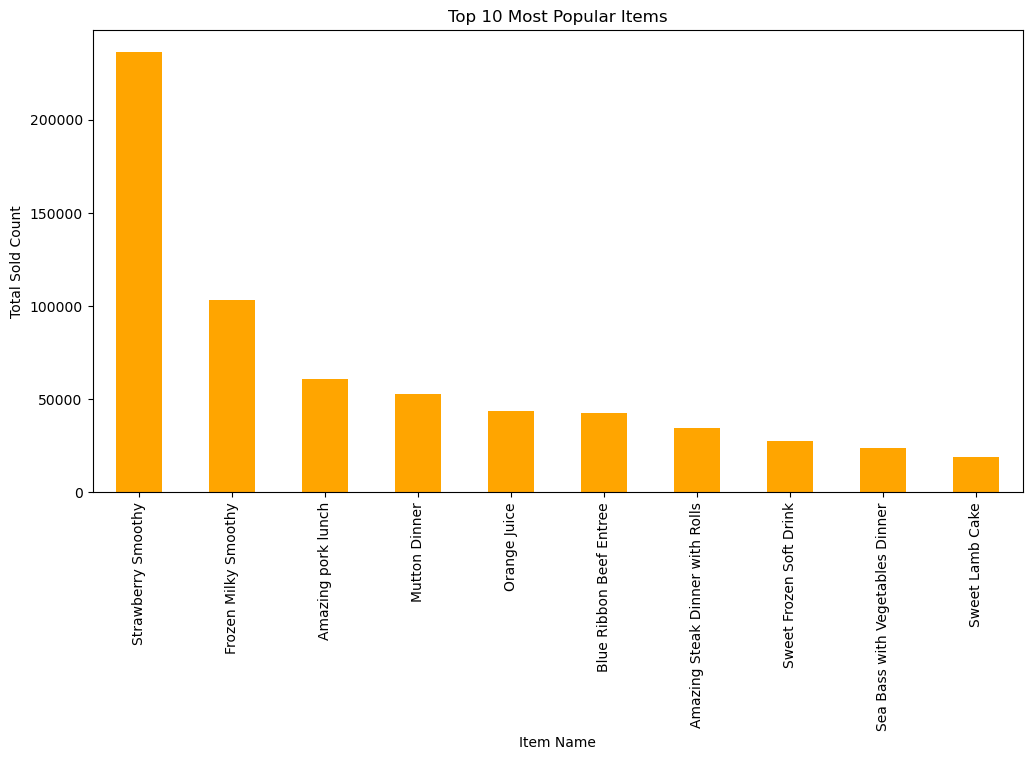

In [23]:
# Most popular items
popular_items = merged_df.groupby('item_name')['item_count'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
popular_items.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Item Name')
plt.ylabel('Total Sold Count')
plt.xticks(rotation=90)
plt.show()

In [24]:
# Most expensive item per store
most_expensive_items = merged_df.loc[merged_df.groupby('store_name')['price'].idxmax(), ['store_name', 'item_name', 'price', 'kcal']]
print("Most Expensive Items Per Restaurant:")
print(most_expensive_items)

Most Expensive Items Per Restaurant:
            store_name                      item_name    price  kcal
101712  Beachfront Bar        Fantastic Milky Smoothy    14.55   318
92111      Bob's Diner                  Mutton Dinner  2224.80   542
30915      Corner Cafe   Awesome Hamburger with Fries    78.12   673
115           Fou Cher  Blue Ribbon Fruity Vegi Lunch   107.96   881
11909         Surfs Up                     Steak Meal    52.42   607
25012      Sweet Shack                Awesome Smoothy     8.34    78


In [26]:
# Save cleaned dataset
merged_df.to_csv(r"D:\Work\IITK_AI_ML\Capstone\Dataset\Capstone 3\cleaned_sales_data.csv", index=False)


In [27]:

print("Data Preprocessing & EDA Completed!")

Data Preprocessing & EDA Completed!


### Machine Learning Model training and Evaluation

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [44]:
# Load preprocessed dataset
merged_df = pd.read_csv(r"D:\Work\IITK_AI_ML\Capstone\Dataset\Capstone 3\cleaned_sales_data.csv")

In [45]:
merged_df.head()

,date,item_id,item_count,price,store_id,item_name,kcal,cost,store_name,sales_amount,day_of_week,month,quarter
0,2019-01-01,3,2,58.44,1,Sweet Fruity Cake,931,29.22,Bob's Diner,116.88,Tuesday,1,1
1,2019-01-01,4,22,581.24,1,Amazing Steak Dinner with Rolls,763,26.42,Bob's Diner,12787.28,Tuesday,1,1
2,2019-01-01,12,7,34.09,1,Fantastic Sweet Cola,478,4.87,Bob's Diner,238.63,Tuesday,1,1
3,2019-01-01,13,12,50.16,1,Sweet Frozen Soft Drink,490,4.18,Bob's Diner,601.92,Tuesday,1,1
4,2019-01-01,16,136,436.56,1,Frozen Milky Smoothy,284,3.21,Bob's Diner,59372.16,Tuesday,1,1


In [46]:
merged_df.columns

Index(['date', 'item_id', 'item_count', 'price', 'store_id', 'item_name',
       'kcal', 'cost', 'store_name', 'sales_amount', 'day_of_week', 'month',
       'quarter'],
      dtype='object')

In [47]:
# Convert date to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce', dayfirst=True)
merged_df.dropna(subset=['date'], inplace=True)

In [48]:
# Feature Engineering
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek
merged_df['month'] = merged_df['date'].dt.month
merged_df['quarter'] = merged_df['date'].dt.quarter

In [49]:
# Prepare data for modeling
features = ['day_of_week', 'month', 'quarter', 'item_count', 'price', 'kcal', 'cost']
target = 'sales_amount'
X = merged_df[features]
y = merged_df[target]

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

In [ ]:
# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9]
}
xgb = XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

In [57]:
# Train models with best parameters
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest (Tuned)': best_rf,
    'XGBoost (Tuned)': best_xgb
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[name] = rmse
    print(f'{name} RMSE: {rmse}')

c:\Users\darji\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression RMSE: 8242.03231766469


c:\Users\darji\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest (Tuned) RMSE: 287.33772441213415
XGBoost (Tuned) RMSE: 582.587130453812


c:\Users\darji\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [54]:
# Save model performance results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'RMSE'])

## Deep learning forecast

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [59]:
merged_df.sort_values(by='date', inplace=True)

In [60]:
merged_df.head()

,date,item_id,item_count,price,store_id,item_name,kcal,cost,store_name,sales_amount,day_of_week,month,quarter
0,2019-01-01,3,2,58.44,1,Sweet Fruity Cake,931,29.22,Bob's Diner,116.88,1,1,1
72,2019-01-01,66,0,0.00,4,Cherry Cake,586,6.31,Fou Cher,0.00,1,1,1
71,2019-01-01,65,0,0.00,4,Lamb with Bread and Vegetables Meal,724,20.02,Fou Cher,0.00,1,1,1
70,2019-01-01,64,0,0.00,6,Roast Mutton Entree,293,16.09,Surfs Up,0.00,1,1,1
69,2019-01-01,63,0,0.00,5,Frozen Chocolate Cake,519,3.74,Corner Cafe,0.00,1,1,1


In [61]:
# Use sales amount for predictions
sales_data = merged_df[['date', 'sales_amount']]


In [62]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
sales_data['scaled_sales'] = scaler.fit_transform(sales_data[['sales_amount']])


C:\Users\darji\AppData\Local\Temp\ipykernel_11168\2247539596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['scaled_sales'] = scaler.fit_transform(sales_data[['sales_amount']])


In [63]:
# Prepare dataset for LSTM
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [64]:
time_steps = 30
train_size = int(len(sales_data) * 0.8)
train_data = sales_data['scaled_sales'][:train_size].values
test_data = sales_data['scaled_sales'][train_size:].values

In [65]:
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

In [66]:
# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [67]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\darji\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_actual, y_pred)
print(f'MAPE: {mape * 100:.2f}%')

Epoch 1/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 2/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 3/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 4/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 5/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 6/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 7/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 8/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 9/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 10/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 11/50
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 12/50
1080/1080 ━━━━━━━

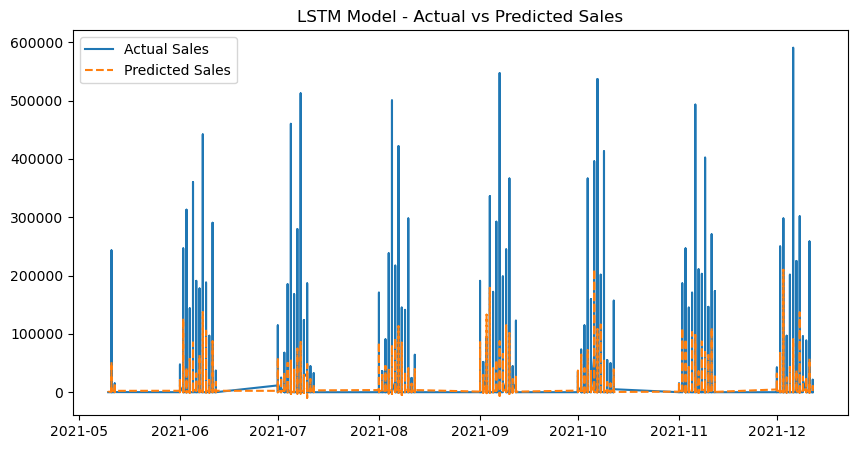

In [69]:
# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.plot(sales_data['date'][train_size+time_steps:], y_test_actual, label='Actual Sales')
plt.plot(sales_data['date'][train_size+time_steps:], y_pred, label='Predicted Sales', linestyle='dashed')
plt.legend()
plt.title('LSTM Model - Actual vs Predicted Sales')
plt.show()


In [70]:
# Forecast for next 3 months
future_steps = 90
future_inputs = sales_data['scaled_sales'][-time_steps:].values.reshape(1, time_steps, 1)
future_predictions = []

for _ in range(future_steps):
    future_pred = model.predict(future_inputs)
    future_predictions.append(future_pred[0, 0])
    future_inputs = np.roll(future_inputs, -1)
    future_inputs[0, -1, 0] = future_pred[0, 0]

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [71]:
# Save predictions
forecast_dates = pd.date_range(start=sales_data['date'].max(), periods=future_steps + 1)[1:]
forecast_df = pd.DataFrame({'date': forecast_dates, 'predicted_sales': future_predictions.flatten()})

In [72]:
forecast_df

,date,predicted_sales
0,2021-12-13,3018.192383
1,2021-12-14,3086.096436
2,2021-12-15,2423.715820
3,2021-12-16,3007.122314
4,2021-12-17,4477.547363
...,...,...
85,2022-03-08,2366.020752
86,2022-03-09,2902.715088
87,2022-03-10,3050.201416
88,2022-03-11,2695.461670


In [73]:
print("LSTM Model Training and Forecasting Completed!")

LSTM Model Training and Forecasting Completed!
